<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB11.%20Chest%20Xray%20Classification%20Using%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest XRay Classification Using YOLOv8



## 1. **Introduction**

### **The Importance of Radiological Images in Medicine**

Medical imaging is a critical component of modern healthcare, providing invaluable insights that aid in diagnosis, treatment planning, and disease monitoring. Among various types of medical images, radiological images play a pivotal role. This section explores the significance of radiological images compared to other medical images and delves into the impact of machine learning in their analysis and diagnostic support.

#### **Types of Medical Imaging**

Medical imaging encompasses a variety of techniques, each with its unique applications and strengths. Key types include:

1. **Radiography (X-rays)**: Uses X-rays to view the internal structure of the body, particularly useful for examining bones and detecting fractures.
2. **Computed Tomography (CT)**: Combines X-ray images taken from different angles to create cross-sectional images, offering detailed views of bones, blood vessels, and soft tissues.
3. **Magnetic Resonance Imaging (MRI)**: Uses strong magnetic fields and radio waves to generate detailed images of organs and tissues, particularly effective for brain, spine, and joint imaging.
4. **Ultrasound**: Uses high-frequency sound waves to produce images of organs and structures inside the body, commonly used in obstetrics and cardiology.
5. **Nuclear Medicine**: Involves the use of radioactive substances to visualize and diagnose the function of organs, including PET and SPECT scans.

#### **Significance of Radiological Images**

Radiological images, primarily encompassing X-rays, CT scans, and MRI, are crucial for several reasons:

1. ##### **Diagnostic Accuracy**:
Radiological imaging techniques provide high-resolution images that are essential for accurate diagnosis. For instance, CT scans offer detailed cross-sectional views that can reveal abnormalities not visible in standard X-rays.

2. ##### **Versatility**:
Radiological images can be used to diagnose a wide range of conditions, from bone fractures and tumors to cardiovascular diseases and neurological disorders. MRI, for example, is particularly valuable for diagnosing soft tissue conditions that other imaging modalities might miss.

3. ##### **Non-invasive Nature**
Radiological imaging methods are non-invasive, reducing the need for exploratory surgeries. This aspect significantly enhances patient safety and comfort.

4. ##### **Real-time Monitoring**
Techniques like fluoroscopy, a type of X-ray, allow real-time imaging, which is invaluable during surgical procedures and catheter placements, ensuring precision and reducing complications.

#### **Comparison with Other Medical Images**

While other medical imaging techniques like ultrasound and nuclear medicine have their specific applications, radiological images often provide superior detail and clarity, especially for complex diagnostic challenges. For example:

- **Ultrasound** is excellent for real-time imaging and safe for use during pregnancy, but it cannot penetrate bone or air-filled structures effectively.
- **Nuclear Medicine** provides functional information about organs, which is invaluable for certain diagnoses, but it lacks the spatial resolution of CT or MRI.

#### **Machine Learning Role in Radiological Imaging**

##### **Enhancing Diagnostic Capabilities**

Machine learning (ML) and artificial intelligence (AI) are revolutionizing radiological imaging. By training algorithms on vast datasets of radiological images, ML models can learn to identify patterns and anomalies with high accuracy.

##### **Key Applications**

1. **Automated Image Analysis**: ML algorithms can automatically detect abnormalities such as tumors, fractures, and infections, reducing the workload on radiologists and increasing diagnostic accuracy.
2. **Predictive Analytics**: AI models can analyze imaging data to predict disease progression and treatment outcomes, aiding in personalized medicine.
3. **Segmentation and Classification**: Advanced ML techniques enable precise segmentation of organs and tissues, facilitating more accurate diagnoses and treatment planning.

##### **Impact on Radiology Practice**

The integration of ML into radiology offers numerous benefits:

- **Increased Efficiency**: Automated analysis speeds up the diagnostic process, allowing radiologists to focus on complex cases.
- **Improved Accuracy**: AI algorithms can detect subtle changes in images that might be missed by the human eye, reducing diagnostic errors.
- **Resource Optimization**: AI can help manage and prioritize imaging studies, ensuring timely intervention for critical cases.

#### **Resources for Further Reading**

To explore more about the importance of radiological images and the impact of machine learning in their analysis, consider the following resources:

1. [Radiological Society of North America (RSNA)](https://www.rsna.org/)
2. [American College of Radiology (ACR)](https://www.acr.org/)
3. [National Institutes of Health (NIH) - Medical Imaging](https://search.nih.gov/search?utf8=%E2%9C%93&affiliate=nih&query=medical+imaging&commit=Searchhttps://www.nih.gov/news-events/nih-research-matters/medical-imaging)
4. [Nature Reviews - Machine Learning in Medical Imaging](https://www.nature.com/articles/s41568-018-0016-yhttps://www.nature.com/search?q=machine+learning+in+medical+imaging)
5. [Radiopaedia - Radiology Reference Articles](https://radiopaedia.org/)

---

This explanation provides a comprehensive overview of the importance of radiological images in medicine and the transformative role of machine learning in enhancing diagnostic capabilities. For more detailed information, refer to the provided links.

## 2. **Setting up our workspace**

---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Mon Aug 12 09:48:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

The command `!nvidia-smi` displays information about the GPU allocated to your Colab session. When you run this command in a code cell, you'll see output providing details about the GPU, such as its name, memory usage, temperature, driver version, among others.

This command allows Google Colab users to check what kind of GPU they have been allocated and get relevant information about its status and resources. It's particularly useful when working with GPU-intensive tasks to ensure the GPU is functioning properly and to monitor its usage.


[**CUDA**](https://www.nvidia.com/object/cuda_home.html) stands for `Compute Unified Device Architecture.` It is a parallel computing platform developed by NVIDIA that enables utilizing the processing power of graphics cards (GPUs) for general-purpose computing tasks, in addition to their traditional graphics and visualization-related tasks.

GPUs, originally designed for handling graphics and rendering, possess a large number of processing cores capable of performing simultaneous calculations at high speed. CUDA provides a programming environment and an Application Programming Interface (API) that allows developers to write code that runs on the GPU instead of the CPU, which can significantly accelerate certain computational tasks.

CUDA is used in a variety of applications and fields, including simulation, machine learning, scientific research, 3D visualization, image and video processing, and more. Numerous popular libraries and frameworks, such as [`TensorFlow`](https://www.tensorflow.org/) and [`PyTorch`](https://pytorch.org/), have support for CUDA, enabling developers to harness the power of GPUs to accelerate their applications and algorithms.

In summary, CUDA is a technology developed by NVIDIA that enables leveraging the processing capability of GPUs for general-purpose tasks, which has had a significant impact on fields requiring intensive computations and parallelization.

### **Setting up our workspace: /content and /content/datasets.**

---
**Set`/content` as HOME  and `/content/datasets` as dataset_dir**

---

We save the root directory of the project `/content` as `HOME` since we will be navigating through the directory to have multiple projects under the same `HOME`. Additionally, we will have the datasets in the `datasets` directory, so all datasets are easily accessible for any project.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


---
**Mount google drive** (if you want save something in it)

---

Next, it imports the drive module from the `google.colab` library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path `/content/drive`. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
**Install roboflow and ultralytics libraries** (1m 30s)

---


We install the necessary Python packages (if they are not already installed, by default).  We dont need use `-q` with `pip` because the output is cleared with `clear_output`.

In [4]:
%%time
# Pip install method (recommended)

%pip install --upgrade pip
%pip install torch torchvision torchaudio
%pip install roboflow
%pip install ultralytics

# clear installation output from  !pip
from IPython import display
display.clear_output()


CPU times: user 451 ms, sys: 87.3 ms, total: 538 ms
Wall time: 1min 16s


---
**Check ultralytics installation**

---

Ultralytics is a technology company specializing in developing tools and software for computer vision, particularly in object detection. They are best known for creating **YOLOv5** (You Only Look Once version 5), one of the most popular and advanced implementations of real-time object detection models.

YOLO is a family of AI models renowned for their ability to accurately and quickly identify and locate objects in images and videos. Ultralytics has made YOLOv5 accessible and easy to customize, providing tools for training object detection models on new datasets, even for those who aren't machine learning experts.

In addition to YOLOv5, Ultralytics offers other services and tools related to computer vision, including open-source implementations and tutorials to help the community develop advanced solutions in this field.

You can learn more about Ultralytics and YOLOv5 on their [official website](https://ultralytics.com/) and explore the [YOLOv5 GitHub repository](https://github.com/ultralytics/yolov5).

In [5]:
# check package y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


---
**Load YOLO models library**

---

We load YOLOv8 and prepare image visualization within the notebook. This way, it's not necessary to use matplotlib, and everything is more direct. YOLOv8 (in its training, validation, and inference) saves partial results in PNG and CSV format.
You can explore more about YOLOv8, including how to use it, by visiting the [Ultralytics YOLOv8 GitHub repository](https://github.com/ultralytics/ultralytics) and the [Ultralytics website](https://ultralytics.com/).

In [6]:
from ultralytics import YOLO

---
**Create dataset directory**

---


Create the [image classification dataset](https://docs.ultralytics.com/datasets/classify/) directory (if it doesn't exist), where we are going to save the dataset with which we are going to train YOLOv8.


The dataset must be organized in a specific split-directory structure under the root directory to facilitate proper training, testing, and optional validation processes. This structure includes separate directories for training (train) and testing (test) phases, with an optional directory for validation (val).

Each of these directories should contain one subdirectory for each class in the dataset. The subdirectories are named after the corresponding class and contain all the images for that class. Ensure that each image file is named uniquely and stored in a common format such as JPEG or PNG.

```
cifar-10-/
|
|-- train/
|   |-- airplane/
|   |   |-- 10008_airplane.png
|   |   |-- 10009_airplane.png
|   |   |-- ...
|   |
|   |-- automobile/
|   |   |-- 1000_automobile.png
|   |   |-- 1001_automobile.png
|   |   |-- ...
|   |
|   |-- bird/
|   |   |-- 10014_bird.png
|   |   |-- 10015_bird.png
|   |   |-- ...
|   |
|   |-- ...
|
|-- test/
|   |-- airplane/
|   |   |-- 10_airplane.png
|   |   |-- 11_airplane.png
|   |   |-- ...
|   |
|   |-- automobile/
|   |   |-- 100_automobile.png
|   |   |-- 101_automobile.png
|   |   |-- ...
|   |
|   |-- bird/
|   |   |-- 1000_bird.png
|   |   |-- 1001_bird.png
|   |   |-- ...
|   |
|   |-- ...
|
|-- val/ (optional)
|   |-- airplane/
|   |   |-- 105_airplane.png
|   |   |-- 106_airplane.png
|   |   |-- ...
|   |
|   |-- automobile/
|   |   |-- 102_automobile.png
|   |   |-- 103_automobile.png
|   |   |-- ...
|   |
|   |-- bird/
|   |   |-- 1045_bird.png
|   |   |-- 1046_bird.png
|   |   |-- ...
|   |
|   |-- ...
```

In [7]:
import os
# MYDRIVE = os.path.join(HOME, "drive/MyDrive") #slow
# Create the datasets directory (if it doesn't exist)
# datasets_dir = os.path.join(MYDRIVE, "datasets") # slow

datasets_dir = os.path.join(os.getcwd(), "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


---
**Download Chest Xray Image_s** (12 s)

---

As we have already seen in a previous notebook (NB2), **[Roboflow](https://roboflow.com/)** is a platform for managing datasets for computer vision tasks, and offers tools for labelling, transforming and downloading datasets. If you want to download a dataset from Roboflow, you can use a code snippet provided by the platform. Here is an example of how a typical Roboflow snippet for downloading a dataset works:

1. In Roboflow, select the dataset you want to download or set up for download.
2. Look for the "Export" or "Download" option in the Roboflow user interface.
3. Roboflow will generate a snippet code that you can copy and paste into your development environment, usually in Python.
4. Make sure you have the necessary libraries or dependencies installed in your environment to run the snippet code.
5. Run the snippet code in your environment. The code usually includes instructions for downloading the dataset and is often provided in the form of a URL or API call.

Note that the specific details of the snippet code may vary depending on how Roboflow has configured your dataset and what download options are provided. If you have access to a specific dataset in Roboflow and want to get a snippet code, I recommend consulting Roboflow's documentation or help for precise instructions on how to download your dataset into your development environment.

In [8]:
%%time

# Change to created directory
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())

# Roboflow Snipet
from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace("universidad-baiw9").project("chest-xray-image_s")
version = project.version(1)
dataset = version.download("folder")


dataset_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chest-xray-image_s-1 in folder:: 100%|██████████| 9260/9260 [00:01<00:00, 5038.72it/s]


CPU times: user 5.64 s, sys: 2.45 s, total: 8.09 s
Wall time: 24.6 s


>**Note:** If there is any problem and the dataset needs to be downloaded again, you must `disconnect` and delete the runtime environment.'

---
**Change to HOME**

---

In [9]:
# Change to created directory
os.chdir(HOME)
print('dir =', os.getcwd())

dir = /content


---
**List dataset directory**

---

In [10]:
# Install Pip Tree globally

!sudo apt install tree -q

!tree --dirsfirst -L 3  "datasets"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123594 files and directories currently installed.)
Preparing

In [22]:
%cd datasets/chest-xray-image_s-1
!mv valid val
%cd /content
print(os.getcwd())

/content/datasets/chest-xray-image_s-1
mv: cannot stat 'valid': No such file or directory
/content
/content


---
**Variable `dataset.location` stores the address**

---

In [23]:
# IMPORTANT Change in datasets val to valid
%cd datasets/chest-xray-image_s-1
!mv valid val
%cd /content
print(os.getcwd())

# IMPORTANT: the variable dataset.location stores the address where
# the Roboflow dataset has been saved.
print(dataset.location)

/content/datasets/chest-xray-image_s-1
mv: cannot stat 'valid': No such file or directory
/content
/content
/content/datasets/chest-xray-image_s-1


## 3. **Displaying some samples from the Dataset**


We can visualize the images provided by GLOB with:

---
**A. [IPYTHON.DISPLAY](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)**

---

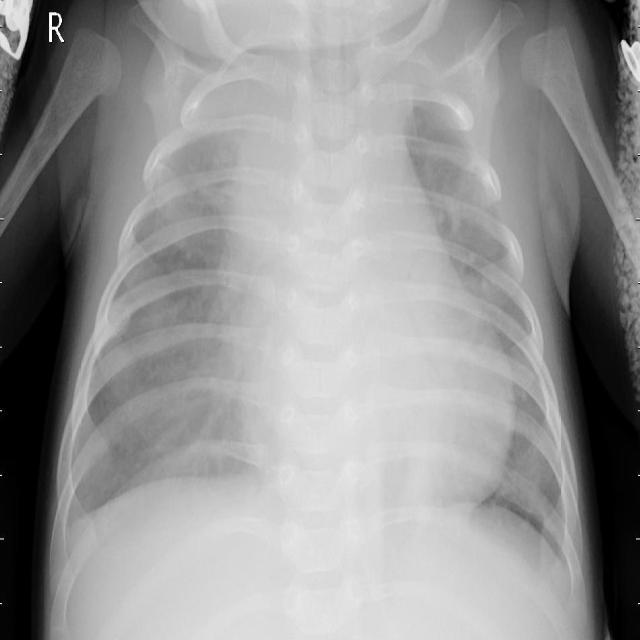

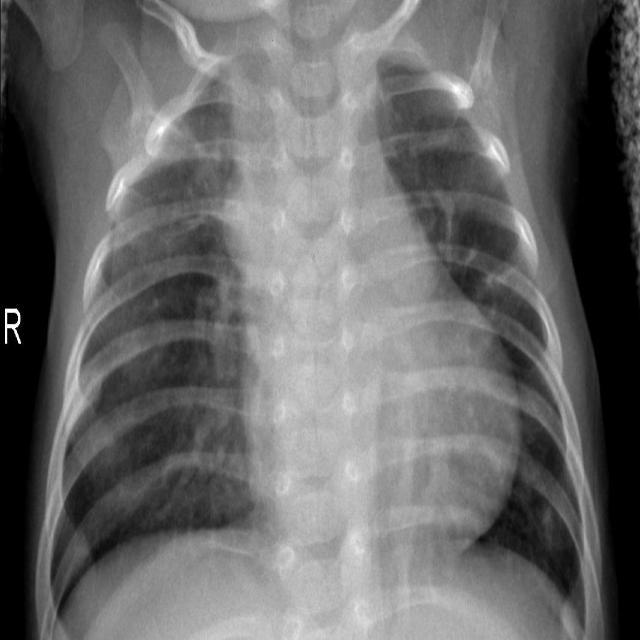

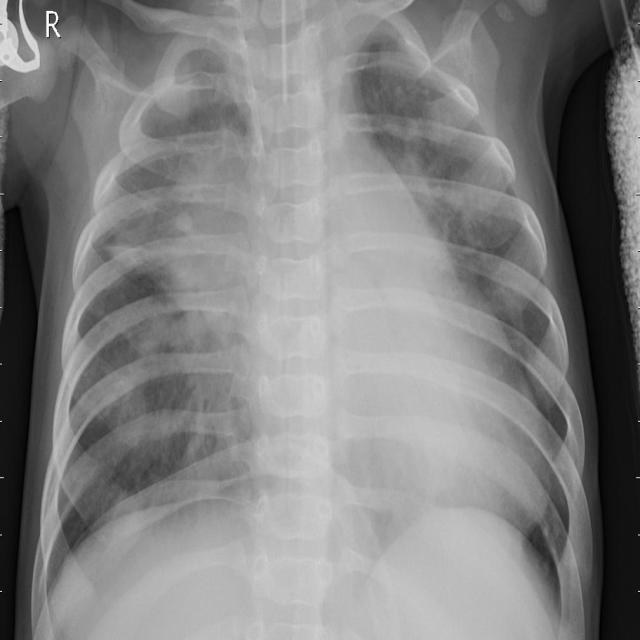

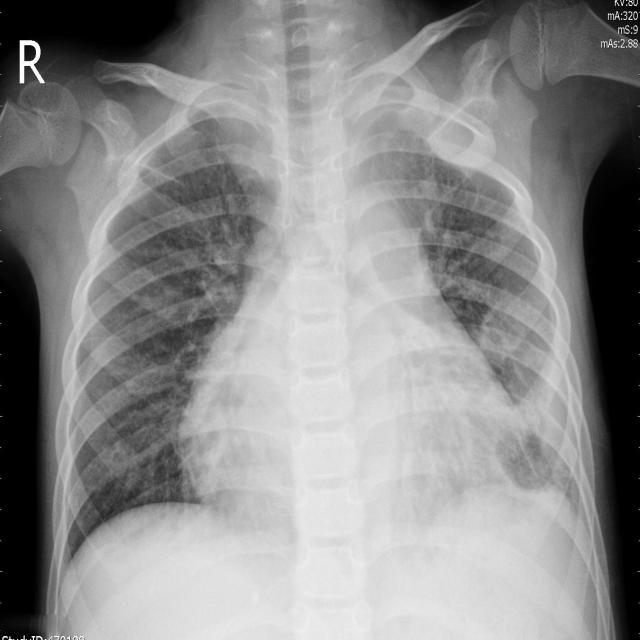

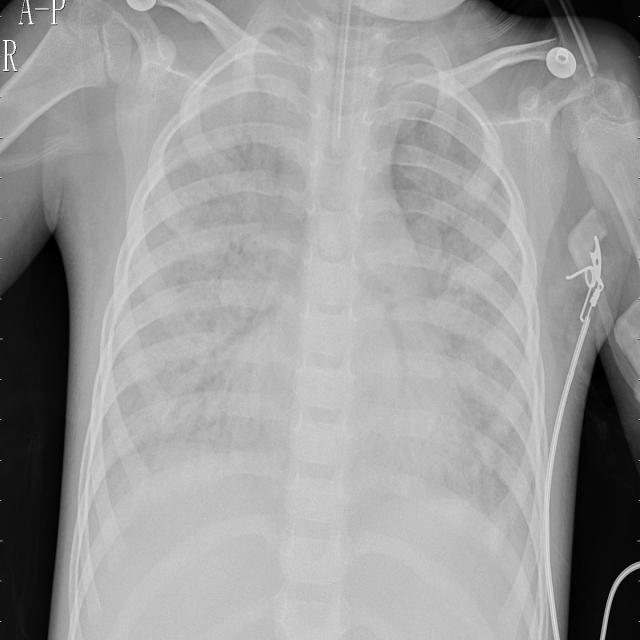

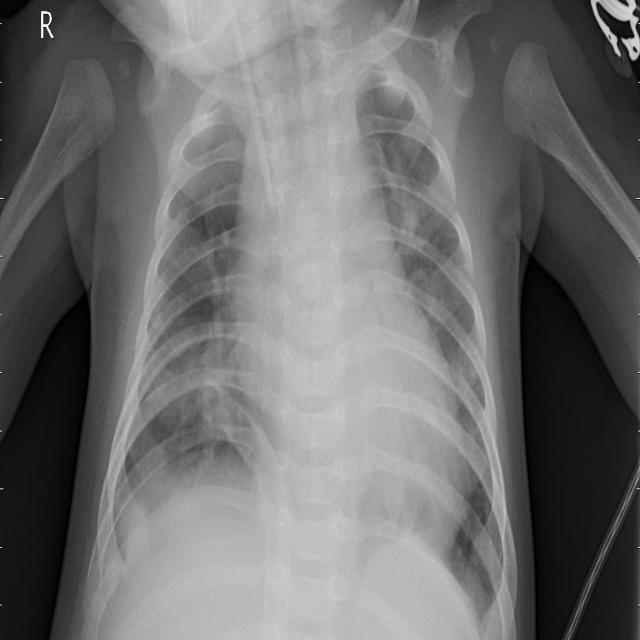

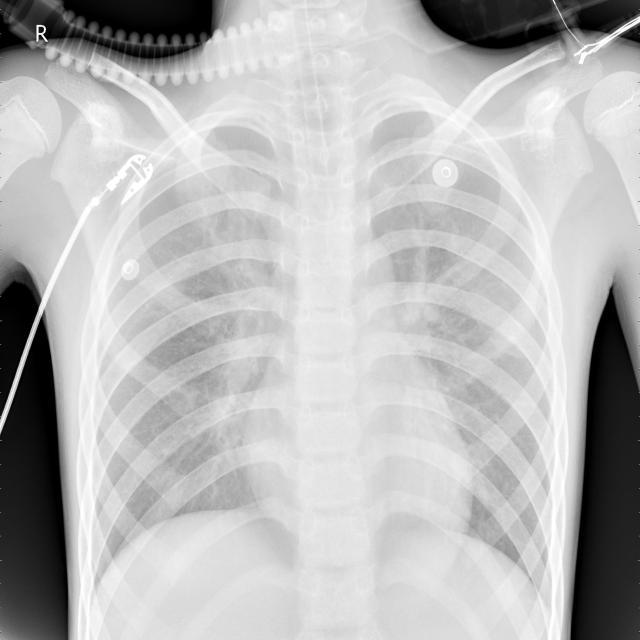

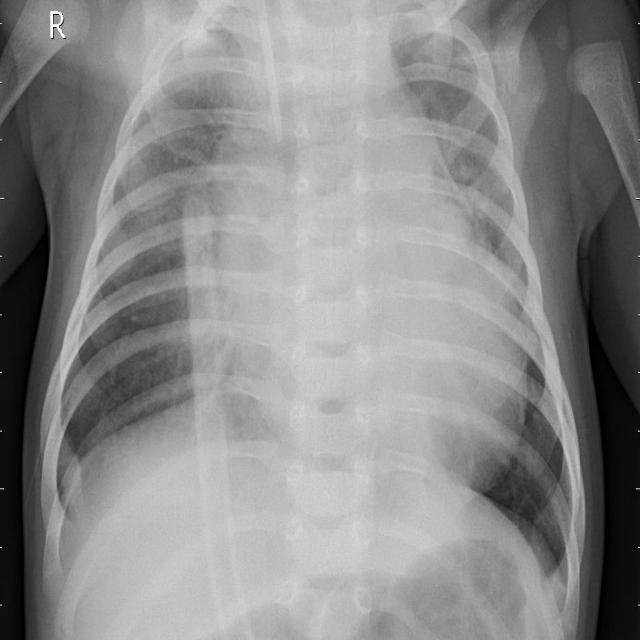

In [24]:
# Let's visualize some images from the dataset.
from IPython.display import display, Image
import glob

for image_path in glob.glob(f'{dataset.location}/test/bacteria/*.jpg')[:8]:
    display(Image(filename=image_path, width=600))
    print("\n")

---
**B. [MATPLOTLIB.IMAGE](https://matplotlib.org/stable/api/imag#e_api.html)**

---

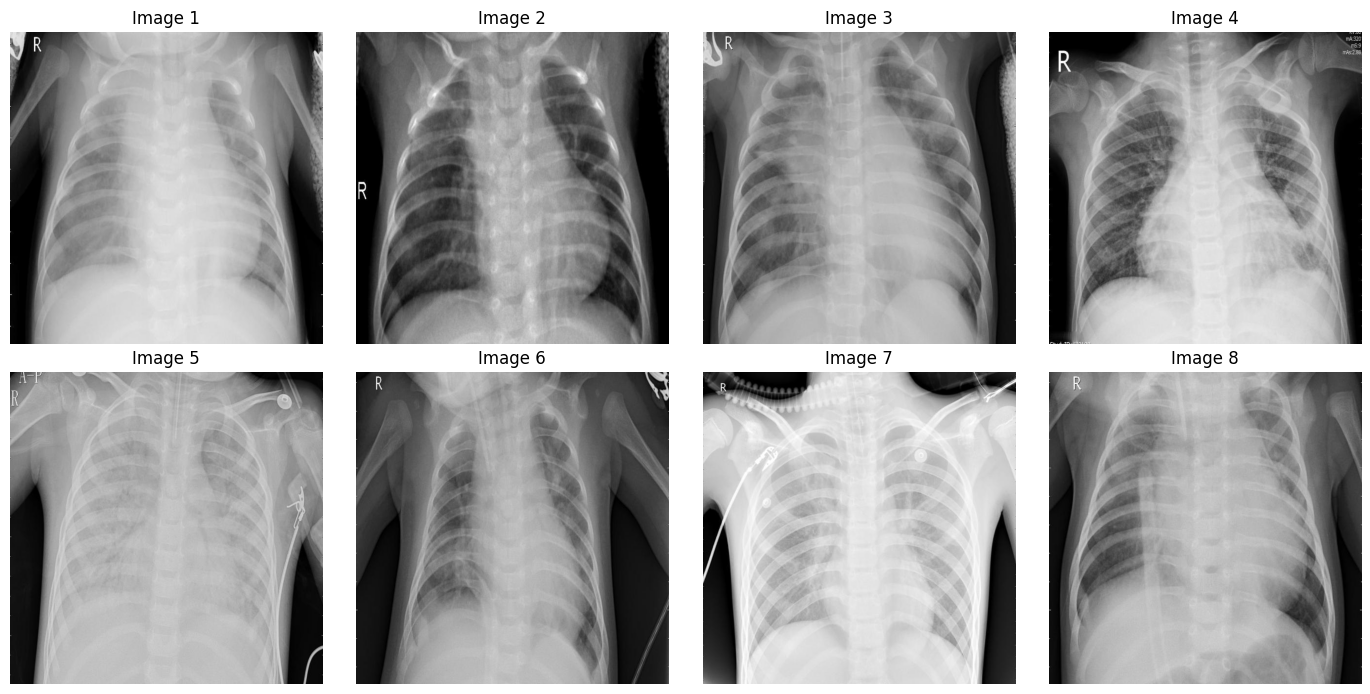

In [25]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**C. [PIL/PILLOW](https://pillow.readthedocs.io/en/stable/)**

---

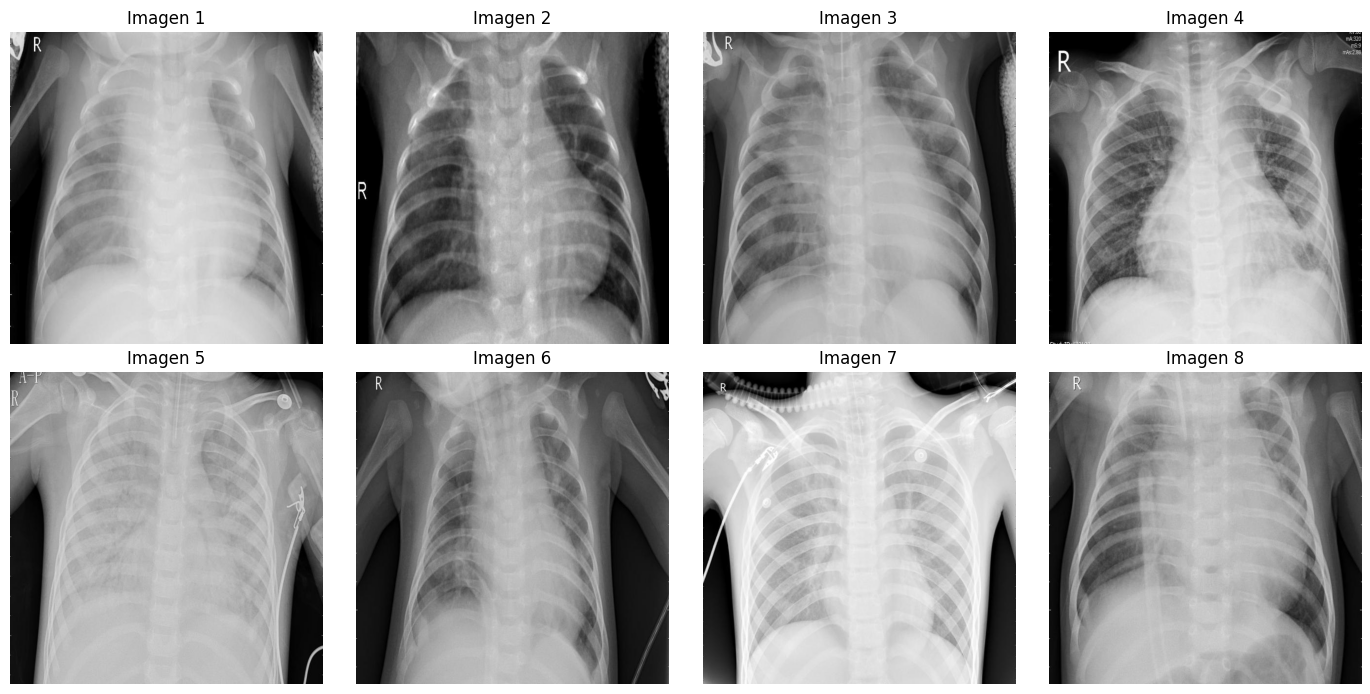

In [26]:
from PIL import Image
import glob
import matplotlib.pyplot as plt


# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = Image.open(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**D. [OpenCV](https://opencv.org/)**

---

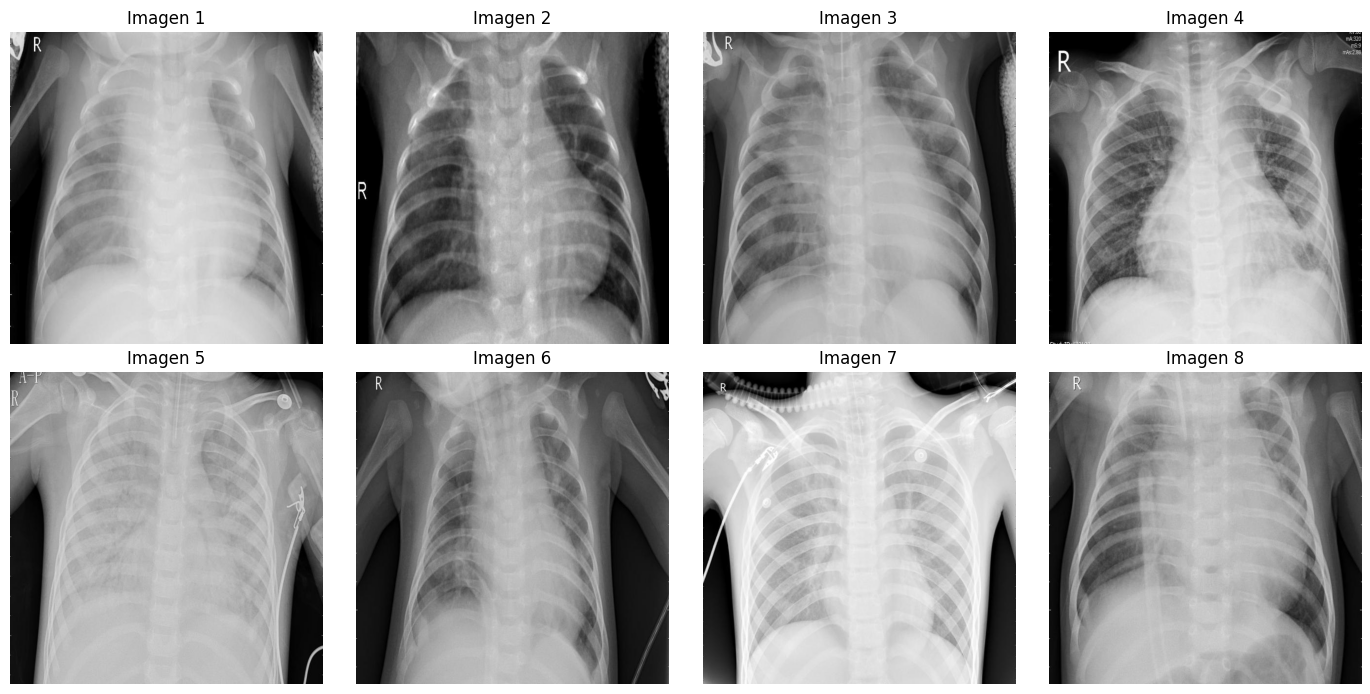

In [27]:
import cv2
import glob
import matplotlib.pyplot as plt


# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

---
**E. [SCIKIT-IMAGE](https://scikit-image.org/)**

---

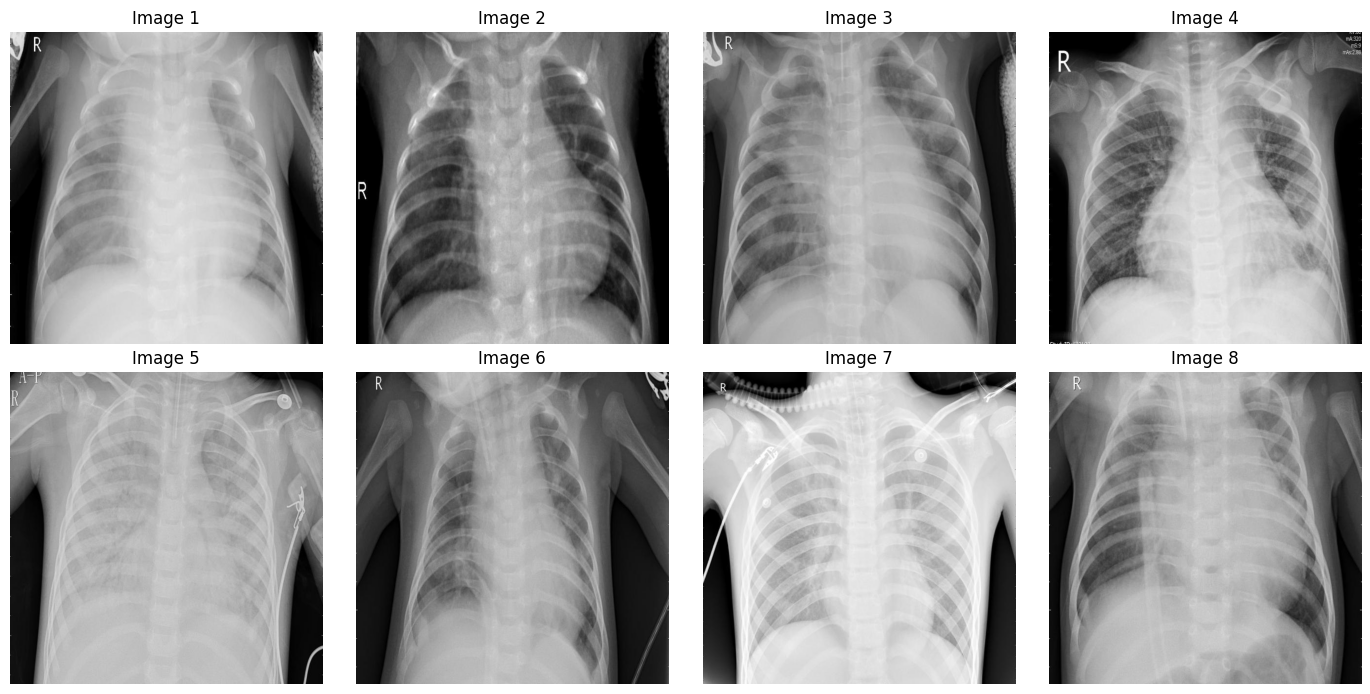

In [28]:
import matplotlib.pyplot as plt
from skimage import io
import glob

# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = io.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


## 4. Training with ULTRALYTICS YOLOv8

"YOLOv8" is an official version of the YOLO (You Only Look Once) series of object detection models. The YOLO series is known for its constant evolution, with various developments occurring to date.



For updated information on any later version of the YOLO series, I recommend consulting official sources such as the open-source repository on [GitHub](https://github.com/ultralytics) and the associated [documentation](https://docs.ultralytics.com/).

YOLOv8 is the latest version of YOLO (You Only Look Once) developed by Ultralytics. As a state-of-the-art (SOTA) model, YOLOv8 builds upon the success of previous versions, introducing new features and improvements for better performance, flexibility, and efficiency. YOLOv8 supports a wide range of computer vision tasks, including `detection, segmentation, pose estimation, tracking, and classification`. This versatility allows users to leverage YOLOv8's capabilities across various applications and domains. This means that YOLOv8 is applicable to a variety of tasks in the field of artificial intelligence, such as object detection and tracking, image segmentation, pose estimation, classification, and more. These enhancements and additional features make YOLOv8 `a cutting-edge model` in the field of computer vision.

Key features and improvements in YOLOv8, according to the provided information, include:

- **Versatility**: YOLOv8 supports a wide variety of computer vision tasks, such as **object detection, segmentation, pose estimation, tracking, and classification**. This versatility makes it applicable to a wide range of applications and domains.

- **Improved performance**: YOLOv8 likely includes performance improvements compared to its predecessors, which is a common goal in developing new versions. Improved performance may involve higher accuracy, faster inference times, or both.

- **Flexibility**: YOLOv8's flexibility is essential, as it allows users to adapt the model to various tasks and scenarios. The ability to handle different computer vision tasks can be valuable for practical applications.

- **State-of-the-art**: Being a state-of-the-art model suggests that YOLOv8 incorporates the latest advances in object detection and computer vision research.

- **Support for various applications**: YOLOv8's capabilities in different artificial intelligence tasks in vision open possibilities for applications in fields such as autonomous vehicles, surveillance, healthcare, and more.

Understanding the different [modes](https://docs.ultralytics.com/modes) that Ultralytics YOLOv8 supports is critical to getting the most out of your models:

1. `Train mode`: Fine-tune your model on custom or preloaded datasets.
2. `Val mode`: A post-training checkpoint to validate model performance.
3. `Predict mode`: Unleash the predictive power of your model on real-world data.
4. `Export mode`: Make your model deployment-ready in various formats.
5. `Track mode`: Extend your object detection model into real-time tracking applications.
6. `Benchmark mode`: Analyze the speed and accuracy of your model in diverse deployment environments.

The YOLO series stood out for its focus on real-time object detection with a single pass of the neural network through the image, making it very efficient. Previous YOLO models, such as YOLOv3, YOLOv4, and YOLOv5, were known for their performance and accuracy in detecting objects in images and videos.

#### **[Classification](https://docs.ultralytics.com/tasks/classify/)**

Image classification is the simplest task of the three (classification, detection, segmentation) and involves classifying a whole image into one of a set of predefined classes.

The output of an image classifier is a single class label and a confidence score. Image classification is useful when you only need to know which class an image belongs to and do not need to know the exact location of objects of that class or their precise shape.

The YOLOv8 models for classification use the suffix `"-cls"`, for example, "yolov8n-cls.pt," and are pretrained on [ImageNet](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml).


---
**Training the dataset**

---

What this process does is that [YOLOv8 is trained](https://docs.ultralytics.com/es/modes/train/) on the `train` subset and validated against `val`. Each time it's trained, we get a subfolder with the results (train, train2, train3, etc.) in the `runs` folder. Let's imagine that after several trials, we have decided that the best training is in train2.

We also see that we have different results for train2 and two saved network models in weights, the best (`best.pt`) and the last (`last.pt`). Finally, the training uses the best training model for a final validation with `best.pt`. Let's see what results train2 provides.

>Note: I'm not sure why Roboflow is not compatible with the names "valid" and "val" for Ultralytics. It's necessary to change the name for it to be detected, though it is optional.


To view the results after training a model with YOLOv8, follow these steps:

1. **Results in the Console**
   - During training, YOLOv8 displays performance metrics like accuracy, loss, and other statistics in each epoch directly in the console. These metrics give you an idea of how well the model is learning.

2. **Results Directory**
   - After training is complete, YOLOv8 creates a directory called `runs/classify/` (for classify) or a similar directory depending on the task (`runs/segment/`, `runs/detect/`, etc.).
   - Inside this directory, you’ll find subfolders named according to the date and time of the training, such as `train`, `train1`, etc.
   - This folder contains several files:
     - **`results.png`**: An image showing graphs of the training and validation metrics over time, like loss, mAP (mean Average Precision), etc.
     - **`best.pt`**: The model weights file that performed best during training.
     - **`last.pt`**: The model weights file from the last epoch.
     - **Log files (`train_batch*.jpg`)**: Images showing examples of model predictions on the training and validation sets.





In [29]:
# Return to HOME from the dataset directory
os.chdir(HOME)
print(os.getcwd())

# Start training. If ".pt" does not exist in the current directory, it will be downloaded.
model = YOLO('yolov8n-cls.pt') # nano-classification model.

classification_train = model.train(data=f'{dataset.location}', epochs=30, save=True) # imgsz=256,

/content
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/chest-xray-image_s-1, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/datasets/chest-xray-image_s-1/train... 7606 images, 0 corrupt: 100%|██████████| 7606/7606 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/chest-xray-image_s-1/val... 1095 images, 0 corrupt: 100%|██████████| 1095/1095 [00:00<00:00, 2349.25it/s]

val: New cache created: /content/datasets/chest-xray-image_s-1/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.14it/s]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  5.86it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:07<00:00,  4.65it/s]

                   all      0.758          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.39it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:06<00:00,  5.48it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:06<00:00,  5.53it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.39it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  5.90it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      0.43G     0.3973          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:06<00:00,  5.16it/s]

                   all      0.815          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30      0.43G     0.3875          6        224: 100%|██████████| 476/476 [01:26<00:00,  5.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.13it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30      0.43G     0.3695          6        224: 100%|██████████| 476/476 [01:21<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:07<00:00,  4.42it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30      0.43G     0.3593          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:06<00:00,  5.03it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30      0.43G     0.3437          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  5.85it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30      0.43G     0.3348          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30      0.43G     0.3295          6        224: 100%|██████████| 476/476 [01:14<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.21it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30      0.43G     0.3082          6        224: 100%|██████████| 476/476 [01:13<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30      0.43G     0.3029          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.41it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30      0.43G     0.2856          6        224: 100%|██████████| 476/476 [01:14<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  4.01it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30      0.43G     0.2747          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.17it/s]

                   all      0.838          1



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem       loss  Instances       Size


      21/30      0.43G     0.2656          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30      0.43G     0.2645          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  5.89it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30      0.43G     0.2596          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:06<00:00,  5.18it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30      0.43G     0.2412          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:07<00:00,  4.88it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30      0.43G      0.235          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.40it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30      0.43G     0.2276          6        224: 100%|██████████| 476/476 [01:14<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30      0.43G     0.2223          6        224: 100%|██████████| 476/476 [01:14<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.24it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30      0.43G     0.2177          6        224: 100%|██████████| 476/476 [01:16<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30      0.43G     0.2153          6        224: 100%|██████████| 476/476 [01:15<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.34it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30      0.43G     0.2104          6        224: 100%|██████████| 476/476 [01:25<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.19it/s]

                   all      0.837          1



30 epochs completed in 0.708 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/chest-xray-image_s-1/train... found 7606 images in 3 classes ✅ 
val: /content/datasets/chest-xray-image_s-1/val... found 1095 images in 3 classes ✅ 
test: /content/datasets/chest-xray-image_s-1/test... found 545 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


                   all      0.843          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


---
**Results Output Console**

---

The log provides comprehensive details about the YOLOv8 training setup, including the model architecture, dataset paths, training parameters, and configuration settings. It confirms that training will use the specified datasets, runs on a GPU, and logs outputs for monitoring.

Here’s a breakdown of the key components:

### **Model Information**

- **Ultralytics YOLOv8.2.76**: The version of the YOLOv8 library you’re using.
- **Python-3.10.12**: Python version.
- **torch-2.3.1+cu121**: PyTorch version with CUDA support.
- **CUDA:0 (Tesla T4, 15102MiB)**: The GPU being used for training (NVIDIA Tesla T4 with 15GB of memory).

### **Training Configuration**

- **Task and Mode**:
  - `task=classify`: Indicates that the model is being used for classification tasks.
  - `mode=train`: Specifies that the model is in training mode.

- **Model**:
  - `model=yolov8n-cls.pt`: The model architecture being used is `yolov8n-cls.pt`.

- **Data**:
  - `data=/content/datasets/chest-xray-image_s-1`: Path to the dataset.
  - `epochs=30`: Number of training epochs.
  - `batch=16`: Batch size used during training.
  - `imgsz=224`: Image size for training.

- **Saving and Caching**:
  - `save=True`: The model will be saved during training.
  - `save_period=-1`: Saves the model at the end of training, not periodically.
  - `cache=False`: Disables caching of images in memory.

- **Training Parameters**:
  - `device=None`: Uses the default device (likely the GPU specified).
  - `workers=8`: Number of data loading workers.
  - `pretrained=True`: Uses pre-trained weights for initialization.
  - `optimizer=auto`: Automatically selects the optimizer.
  - `verbose=True`: Enables detailed logging.

- **Regularization and Augmentation**:
  - `dropout=0.0`: Dropout rate is set to 0.
  - `augment=False`: Data augmentation is disabled.
  - `mixup=0.0`, `copy_paste=0.0`: Mixup and copy-paste augmentations are disabled.

### **Dataset Information**

- **Train Dataset**:
  - Found `7606 images` in `3 classes` under `/content/datasets/chest-xray-image_s-1/train`.
  
- **Validation Dataset**:
  - Found `1095 images` in `3 classes` under `/content/datasets/chest-x-ray-image_s-1/val`.

- **Test Dataset**:
  - Found `545 images` in `3 classes` under `/content/datasets/chest-x-ray-image_s-1/test`.

### **Model Architecture**

- **YOLOv8n-cls Summary**:
  - **Layers**: 99 layers.
  - **Parameters**: 1,442,131.
  - **Gradients**: 1,442,131.
  - **GFLOPs**: 3.4 billion floating-point operations.

- **Model Layer Details**:
  - Lists the components of the model including convolutional layers, blocks, and classification heads, along with the parameters and arguments used.

### **Training Details**

- **Transferred Weights**:
  - `Transferred 156/158 items from pretrained weights`: Indicates that most of the pretrained weights were successfully transferred to the model.

- **TensorBoard**:
  - Provides instructions to view training progress and model graph using TensorBoard.

- **AMP (Automatic Mixed Precision)**:
  - Indicates that AMP is being used for mixed precision training, and the checks passed successfully.

- **Optimizer**:
  - The optimizer `AdamW` was chosen automatically with specific learning rates and momentum values.

- **Caching**:
  - New cache created for the validation dataset.

- **Logging**:
  - Results and logs are being saved to the `runs/classify/train2` directory.

### **Warnings and Notes**

- **JAX Warning**:
  - `os.fork() was called...`: A warning about compatibility issues with JAX and multi-threaded code. This is informational and usually doesn’t affect training unless you use JAX.


The output you’ve provided is a log from a specific epoch during the training process of a YOLOv8 model. Let’s break down what each part of this log means:

### **Epoch Log Details**

#### **Header**
```
Epoch    GPU_mem       loss  Instances       Size
```
- **Epoch**: Indicates the current epoch number out of the total epochs.
- **GPU_mem**: The amount of GPU memory used during this epoch.
- **loss**: The loss value for the current epoch.
- **Instances**: The number of instances (batches) processed.
- **Size**: The size of the images being processed.

#### **Details for Epoch 7/30**
```
       7/30      0.43G      0.437          6        224: 100%|██████████| 476/476 [01:21<00:00,  5.83it/s]
```
- **7/30**: Indicates this is the 7th epoch out of a total of 30 epochs.
- **0.43G**: GPU memory usage for this epoch (0.43 GB).
- **0.437**: The average loss value for this epoch.
- **6**: The number of instances (batches) processed per iteration or epoch.
- **224**: Image size used for training.
- **100%**: Indicates the completion percentage of the epoch.
- **476/476**: Number of batches processed out of the total (476 batches processed).
- **[01:21<00:00,  5.83it/s]**: The epoch took 1 minute and 21 seconds to complete, with a processing speed of 5.83 batches per second.

#### **Validation Metrics**
```
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:05<00:00,  6.39it/s]
                 all      0.826          1
```
- **classes**: This might represent different classification metrics, all.
- **top1_acc**: Top-1 accuracy during validation, 0.826.
- **top5_acc**: Top-5 accuracy during validation, 1.
- **100%**: Indicates the completion percentage of the validation phase.
- **35/35**: Number of validation batches processed out of the total (35 batches processed).
- **[00:05<00:00,  6.39it/s]**: The validation took 5 seconds, with a processing speed of 6.39 batches per second.

**Top-1 accuracy** and **Top-5 accuracy** are common metrics used to evaluate the performance of classification models, especially in tasks like image classification. Here’s what each term means:

### **Top-1 Accuracy**

- **Definition**: Top-1 accuracy measures the percentage of times the model’s top (most confident) prediction is the correct label.
- **Example**: If a model predicts "cat" as the most likely label for an image, and the actual label is "cat", this counts as a correct prediction. Top-1 accuracy is calculated as:
  $$
  \text{Top-1 Accuracy} = \frac{\text{Number of Correct Top-1 Predictions}}{\text{Total Number of Predictions}}
  $$
- **Interpretation**: A higher Top-1 accuracy means the model is better at predicting the exact correct class as its top choice. It’s a stringent measure because it only considers the model's single most confident prediction.

### **Top-5 Accuracy**

- **Definition**: Top-5 accuracy measures the percentage of times the true label is among the model’s top 5 most confident predictions.
- **Example**: If a model ranks the correct label within its top 5 predictions (e.g., "cat" is among the top 5 predicted labels for an image), this counts as a correct prediction. Top-5 accuracy is calculated as:
  $$
  \text{Top-5 Accuracy} = \frac{\text{Number of Correct Predictions within Top-5}}{\text{Total Number of Predictions}}
  $$
- **Interpretation**: Top-5 accuracy provides a more lenient measure than Top-1 accuracy. It’s useful when the model’s top prediction might not be correct, but it’s reasonable to expect that the correct label should appear in a broader set of predictions.

### **Use Case**

- **Top-1 Accuracy**: This metric is critical when the task requires a single, exact prediction (e.g., identifying a specific object in an image).
- **Top-5 Accuracy**: This metric is particularly useful in cases where a wider range of possible answers might be acceptable or when you expect that the correct answer could be in the top predictions (e.g., large-scale image classification tasks where exact identification is challenging).

### **Epoch 7 Summary**
For epoch 7 out of 30:
- **GPU Memory Usage**: 0.43 GB.
- **Average Loss**: 0.437.
- **Image Size**: 224x224.
- **Training Time**: 1 minute and 21 seconds, processing 5.83 batches per second.
- **Validation Performance**:
  - Validation completed with 35 batches processed in 5 seconds.
  - Overall validation accuracy is 82.6%.



### **Entire Train Log Summary**

```
30 epochs completed in 0.708 hours.
```
- **Meaning**: The training process has finished 30 epochs, which took a total of 0.708 hours (approximately 42.5 minutes).

### **Optimizer Information**

```
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB
```
- **Meaning**: The optimizer state has been removed from the saved model weights. This is a common practice to reduce the size of the saved model files. Both `last.pt` and `best.pt` weights files were reduced to 3.0 MB each after removing optimizer information.

### **Validation**

```
Validating runs/classify/train2/weights/best.pt...
```
- **Meaning**: The model's performance is being validated using the best weights saved during training, located at `runs/classify/train2/weights/best.pt`.

### **Validation Metrics**

```
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
```
- **Ultralytics YOLOv8.2.76**: Version of YOLOv8 used.
- **Python-3.10.12**: Python version.
- **torch-2.3.1+cu121**: PyTorch version with CUDA support.
- **CUDA:0 (Tesla T4, 15102MiB)**: GPU used (NVIDIA Tesla T4 with 15 GB of memory).
- **YOLOv8n-cls summary (fused)**:
  - **73 layers**: Number of layers in the model.
  - **1,438,723 parameters**: Total number of parameters in the model.
  - **0 gradients**: Indicates no gradients are being displayed or computed in this summary.
  - **3.3 GFLOPs**: Number of giga floating-point operations per second, a measure of the model's computational complexity.

### **Dataset Summary**

```
train: /content/datasets/chest-xray-image_s-1/train... found 7606 images in 3 classes ✅
val: /content/datasets/chest-x-ray-image_s-1/val... found 1095 images in 3 classes ✅
test: /content/datasets/chest-x-ray-image_s-1/test... found 545 images in 3 classes ✅
```
- **train**: The training dataset contains 7,606 images across 3 classes.
- **val**: The validation dataset contains 1,095 images across 3 classes.
- **test**: The test dataset contains 545 images across 3 classes.

### **Validation Results**

```
               classes   top1_acc   top5_acc: 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]
                   all      0.843          1
```
- **classes**: Results for each class (not detailed here).
- **top1_acc**: Top-1 accuracy during validation, which is 84.3%.
- **top5_acc**: Top-5 accuracy during validation, which is 100% (i.e., the true class was among the top 5 predictions in every case).

### **Inference Speed**

```
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
```
- **Meaning**: Average time taken per image for various stages of processing:
  - **Preprocess**: 0.1 milliseconds.
  - **Inference**: 0.4 milliseconds.
  - **Loss**: 0.0 milliseconds (not applicable or negligible here).
  - **Postprocess**: 0.0 milliseconds (not applicable or negligible here).

### **Results Saving**

```
Results saved to runs/classify/train2
Results saved to runs/classify/train2
```
- **Meaning**: The final results, including the model's performance metrics and weights, have been saved to the specified directory (`runs/classify/train2`).



---
**Results directory**

---

Classification_train.save_dir` is where the classification results are saved.


In [30]:
print(classification_train.save_dir)

runs/classify/train2


`classify_train.save_dir` holds the last directory where the training results were saved, but sometimes it's better to use a previous training, so instead of using `classify_train.save-dir`, we're going to use a slight modification that allows us to "manually" use any training result.

---
**Display training results**

---

In [31]:
classify_train_save_dir= os.path.join(HOME,'runs/classify/train2')

print(os.listdir(classify_train_save_dir),'\n')

!ls -la {classify_train_save_dir}

['val_batch1_labels.jpg', 'weights', 'args.yaml', 'val_batch2_labels.jpg', 'results.png', 'train_batch0.jpg', 'confusion_matrix_normalized.png', 'val_batch2_pred.jpg', 'events.out.tfevents.1723456928.c56a51e0f887.181.1', 'results.csv', 'train_batch2.jpg', 'confusion_matrix.png', 'train_batch9521.jpg', 'train_batch9520.jpg', 'val_batch0_labels.jpg', 'val_batch1_pred.jpg', 'val_batch0_pred.jpg', 'train_batch1.jpg', 'train_batch9522.jpg'] 

total 1852
drwxr-xr-x 3 root root   4096 Aug 12 10:44 .
drwxr-xr-x 4 root root   4096 Aug 12 10:02 ..
-rw-r--r-- 1 root root   1562 Aug 12 10:02 args.yaml
-rw-r--r-- 1 root root 113545 Aug 12 10:44 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 102978 Aug 12 10:44 confusion_matrix.png
-rw-r--r-- 1 root root 130922 Aug 12 10:46 events.out.tfevents.1723456928.c56a51e0f887.181.1
-rw-r--r-- 1 root root   5952 Aug 12 10:44 results.csv
-rw-r--r-- 1 root root 130457 Aug 12 10:44 results.png
-rw-r--r-- 1 root root 112175 Aug 12 10:02 train_batch0.jpg
-

---
**Print results.csv**

---

In [32]:
!cat {classify_train_save_dir}/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 0.7699,                0.78082,                      1,                0.78189,              0.0002375,              0.0002375,              0.0002375
                      2,                0.57336,                0.80548,                      1,                0.75755,             0.00045981,             0.00045981,             0.00045981
                      3,                0.53174,                0.75799,                      1,                0.78963,             0.00066641,             0.00066641,             0.00066641
                      4,                0.51135,                0.80457,                      1,                0.75239,             0.00064331,             0.00064331,             0.00064331
                      5,                

The command `!cat {classify_train_save_dir}/results.csv | head -10` is used to display the first 10 lines of the `results.csv` file located in the directory specified by `classify_train_save_dir`.

The partial output is the first 10 lines of this CSV file, which is a training logs from our model training process. Below is a detailed explanation of each column in the output:

1. **epoch**: Indicates the training epoch, which is a single pass through the entire training dataset.
2. **train/loss**: The loss value on the training dataset for that epoch. Lower values indicate a better fit of the model to the training data.
3. **metrics/accuracy_top1**: The top-1 accuracy on the training dataset. This measures how often the model's top prediction (the class with the highest predicted probability) matches the true class label.
4. **metrics/accuracy_top5**: The top-5 accuracy on the training dataset. This measures how often the true class label is within the top 5 predicted probabilities.
5. **val/loss**: The loss value on the validation dataset for that epoch. It helps in understanding how well the model is generalizing to unseen data.
6. **lr/pg0, lr/pg1, lr/pg2**: Learning rates for different parameter groups of the model. Learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

For example:

- **Epoch 1**:
  - Train Loss: 0.7699
  - Top-1 Accuracy: 78,082%
  - Top-5 Accuracy: 100%
  - Validation Loss: 0.78189
  - Learning Rates: 0.0002375 for all parameter groups

- **Epoch 2**:
  - Train Loss: 0.57336
  - Top-1 Accuracy: 80.548%
  - Top-5 Accuracy: 100%
  - Validation Loss: 0.75755
  - Learning Rates: 0.00045981 for all parameter groups

The trend in the data suggests that the training loss is decreasing over epochs, which is generally a good sign of the model learning. The top-1 accuracy is increasing, indicating better performance on the training data. The learning rates are adjusted as training progresses.


---
**Print results.csv with pandas**

---

In [36]:
import pandas as pd


# Read CSV file in a Pandas DataFrame
df = pd.read_csv(f'{classify_train_save_dir}/results.csv')
df.head(10)
# Display the first 10 records
print(df.head(10))

                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.76990                  0.78082   
1                        2                  0.57336                  0.80548   
2                        3                  0.53174                  0.75799   
3                        4                  0.51135                  0.80457   
4                        5                  0.48189                  0.81005   
5                        6                  0.45987                  0.82009   
6                        7                  0.43705                  0.82648   
7                        8                  0.41801                  0.82192   
8                        9                  0.40662                  0.80639   
9                       10                  0.39727                  0.81461   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                        1             

---
**Print confusion matrix and confusion matrix normalized**

---

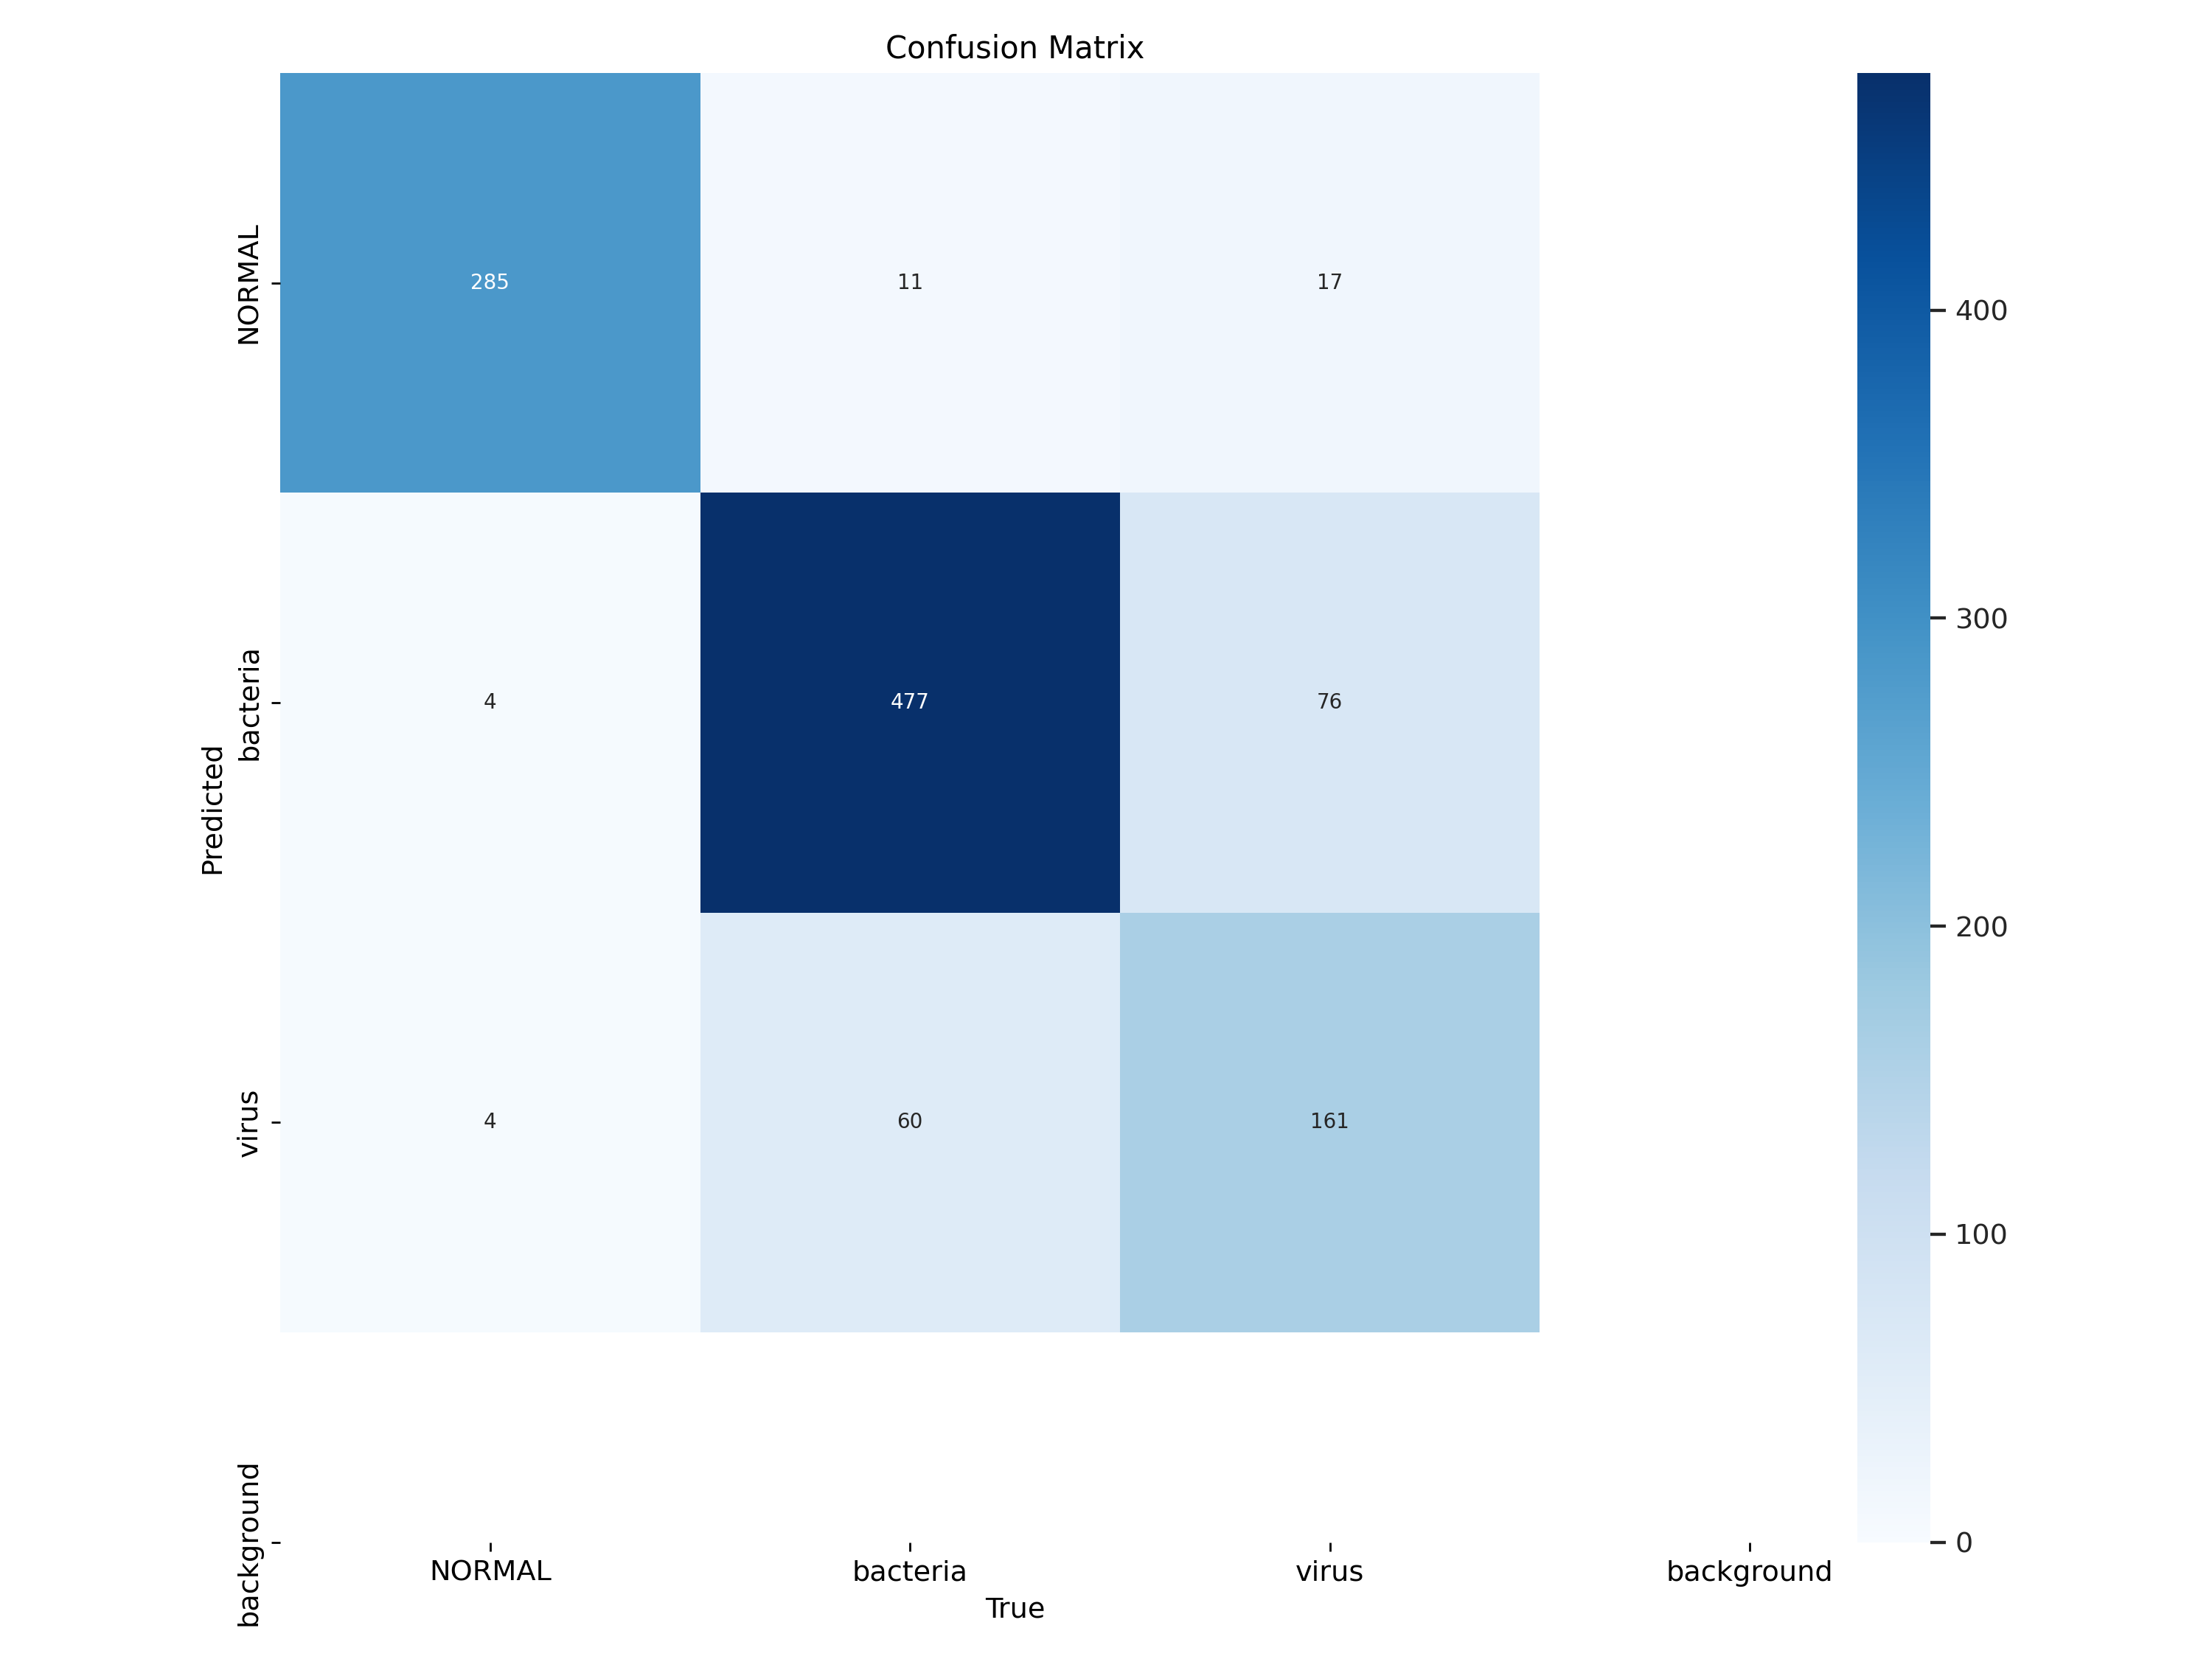

In [38]:
from IPython.display import display, Image

Image(filename=f'{classify_train_save_dir}/confusion_matrix.png',width=800)

A confusion matrix is a performance measurement tool for evaluating the performance of a classification algorithm. It shows the relationship between the actual labels and the predicted labels by the classifier. Each row of the matrix represents the instances of the actual class, while each column represents the instances of the predicted class.

### Components of a Confusion Matrix

Let's consider a binary classification problem (two classes: positive and negative):

```
           Predicted Negative (N)   Predicted Positive (P)
Actual N          TN                     FP
Actual P          FN                     TP
```

Where:
- **TN (True Negative)**: The number of instances that were correctly classified as negative.
- **FP (False Positive)**: The number of instances that were incorrectly classified as positive.
- **FN (False Negative)**: The number of instances that were incorrectly classified as negative.
- **TP (True Positive)**: The number of instances that were correctly classified as positive.

### Interpretation of the Confusion Matrix

From the confusion matrix, several important performance metrics can be derived:

1. **Accuracy**: The ratio of correctly predicted instances (both true positives and true negatives) to the total instances.
   
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
   
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in the actual class.
   
  $$
   \text{Recall} = \frac{TP}{TP + FN}
  $$

4. **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns.
   
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Specificity**: The ratio of correctly predicted negative observations to all observations in the actual negative class.
   
   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

A confusion matrix provides a detailed breakdown of the classifier's performance, highlighting where it gets confused between different classes. By analyzing the confusion matrix, one can identify patterns of misclassification and potentially improve the model's performance.

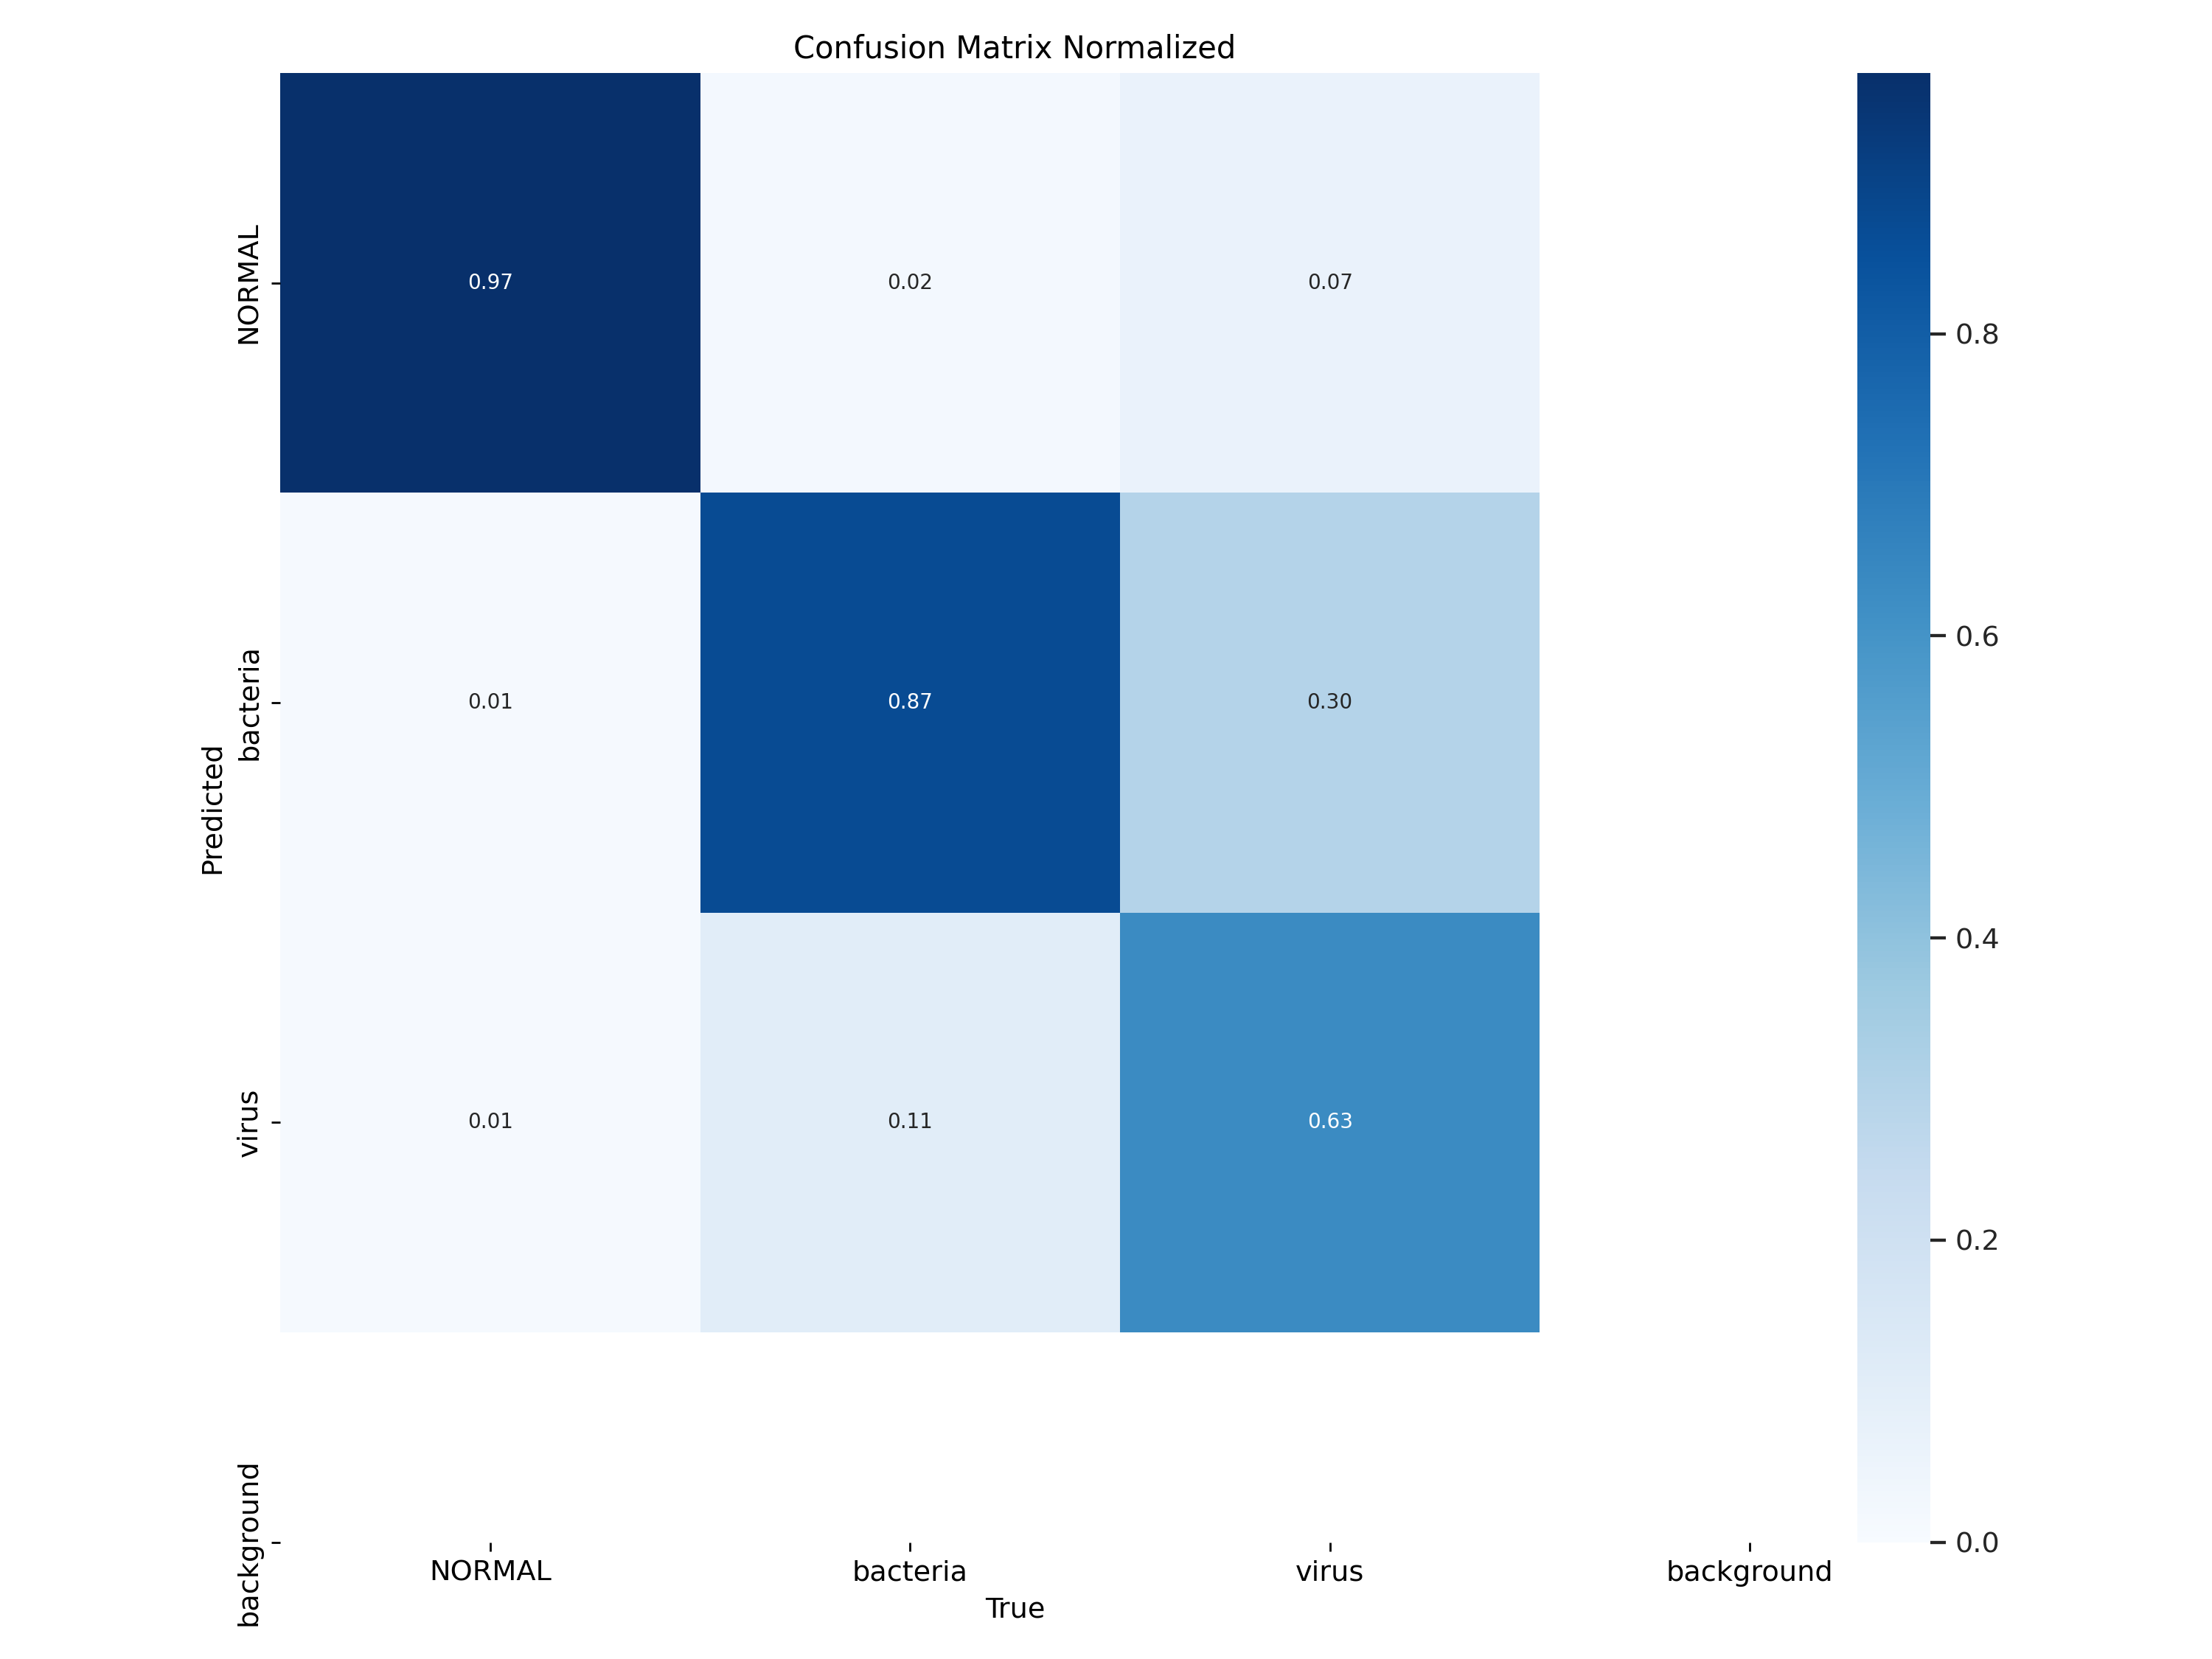

In [39]:
Image(filename=f'{classify_train_save_dir}/confusion_matrix_normalized.png',width=800)

A normalized confusion matrix is a variant of the confusion matrix where the values are normalized, usually to show the relative frequencies of the predictions rather than absolute counts. This normalization helps to compare the performance of a classifier more easily, especially when dealing with imbalanced datasets where some classes may have more samples than others.

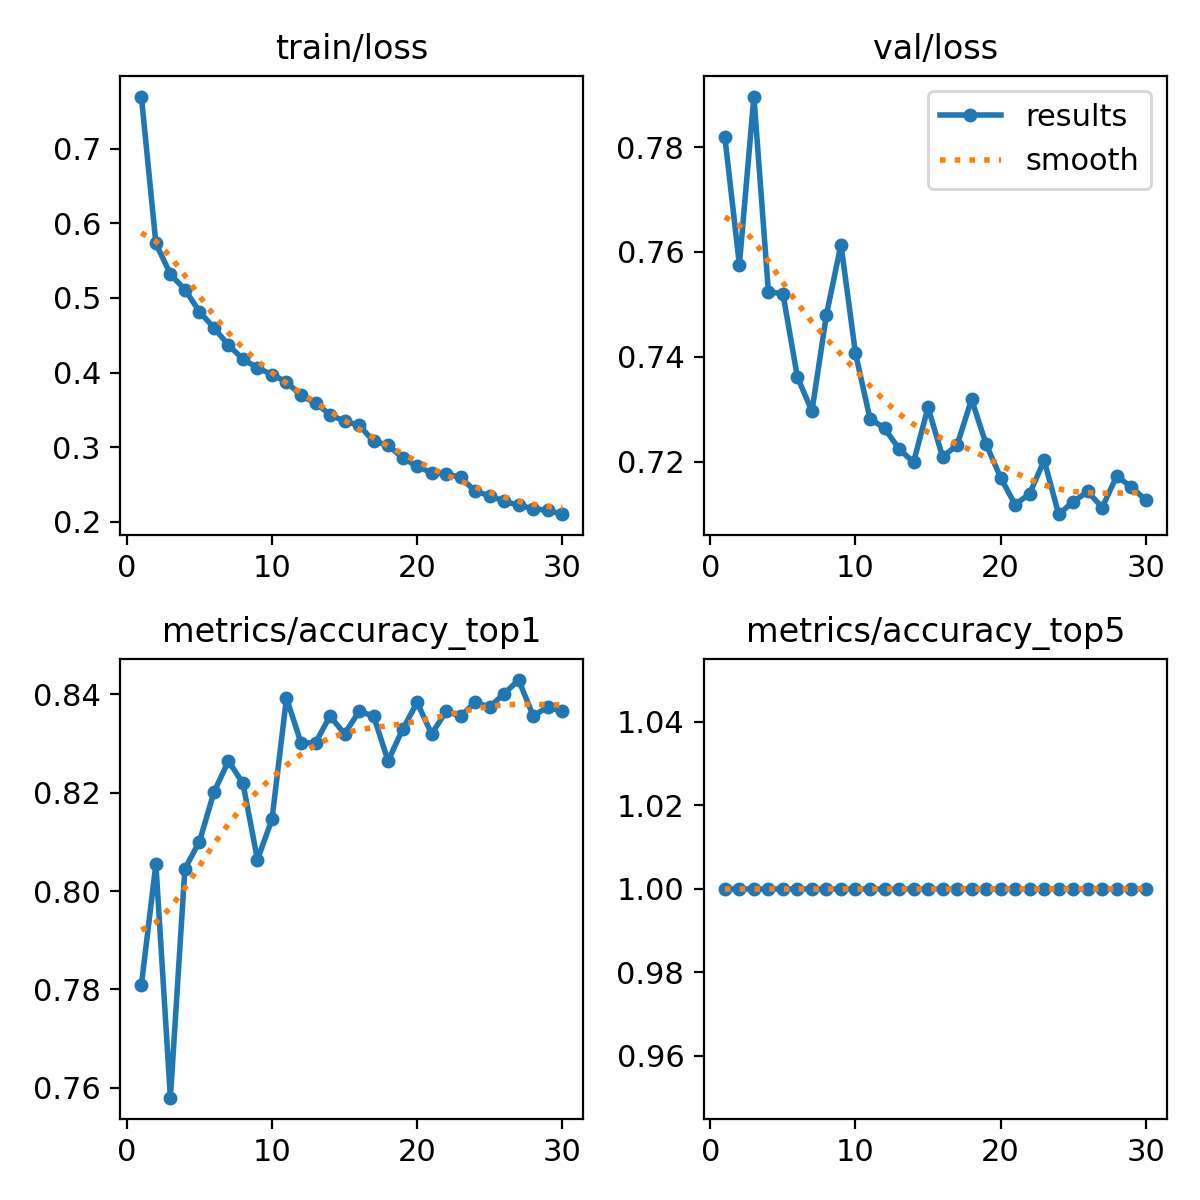

In [40]:
Image(filename=f'{classify_train_save_dir}/results.png',width=800)

---
**Display some examples** (train_batch1)

---

In [ ]:
Image(filename=f'{classify_train_save_dir}/train_batch1.jpg',width=800)

---
**Display some example (val_batch1 labels vs pred_batch1 labels)**

---

In [ ]:
Image(filename=f'{classify_train_save_dir}/val_batch1_labels.jpg',width=800)

In [ ]:
Image(filename=f'{classify_train_save_dir}/val_batch1_pred.jpg',width=800)

In [ ]:
""" # We can, instead of training locally as we have done, use the model already
# trained by roboflow and infer locally.

from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace().project("license-plate-recognition-rxg4e")
model = project.version(4).model.download('roboflow.pt')
 """

In [ ]:

# infer on a local image
#print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())


## 5. Evaluation

We have used the train and val subsets to train YOLOv8. We are going to take the best weights obtained in training (train2) and use them to evaluate the model using the `val` mode (as opposed to the `classify`, `train`, or `detect` modes). The `val` mode uses a `val` dataset that has not been used as a dataset during training (it uses train and test). **The results provided by the validation are the true metrics of the model that should concern us**.

---
**Evaluate the model**

---

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{classify_train_save_dir}/weights/best.pt') #load my custom model

classify_val = model.val(data=f'{dataset.location}', save=True) #imgsz=256

---
**Results val.save_dir**

---

In [ ]:
classify_val_save_dir = classify_val.save_dir
#classify_val_save_dir= 'runs/classify/val3'
!ls -la {classify_val_save_dir}

---
**Confusion Matrix**

---

In [ ]:
Image(filename=f'{classify_val_save_dir}/confusion_matrix.png',width=600)

---
**Confusion Matrix Normalized**

---

In [ ]:
Image(filename=f'{classify_val_save_dir}/confusion_matrix_normalized.png',width=600)

---
**batch 0 (labels or ground truth)**

---


In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_labels.jpg',width=600)

---
**batch 0 (predictions)**

---

In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_pred.jpg',width=600)

## 6. [Inference](https://docs.ultralytics.com/es/modes/predict/) (prediction)

---
**Inference**

---

Use the `model.predict` method to run the model on your `test` dataset. This method will generate predictions for each image in the dataset.

In [ ]:
# Perform inference on the test dataset
results = model.predict(source='datasets/test', save=True)

---
**Inspect the results**

---


If `save=True`, the results (annotated images) will be saved to a directory, typically a runs folder generated in your current working directory.

In [ ]:
# Example: Print the results of the first image
print(results[0].boxes)


## 7. [Printing from Colab (convert notebook to pdf)](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-print-colab.ipynb#scrollTo=7a810845-9125-48d3-a819-b1cdb1e15399)

You need to save a copy to Google Drive by selecting `File -> Save a copy to Drive`.

In [ ]:
!apt-get update
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/NB11. Chest Xray Classification Using YOLOv8.ipynb' --to pdf

## `NOTEBOOK PRACTICE 11`

---
Modify the baseline notebook to get better performance.

---

### Instructions to Improve the Notebook (study and work about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.

You can use a model different from nano. You can use other biomedical multiclass (3 o 4 classes) dataset. you can use a diferent number of epochs. You can use [augmentations](https://docs.ultralytics.com/es/modes/train/#augmentation-settings-and-hyperparameters).

Feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.

Happy coding!